In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import operator

In [2]:
titanic = pd.read_csv('titanic/train.csv')

In [3]:
surv = titanic[titanic['Survived'] == 1].Age
dead = titanic[titanic['Survived'] == 0].Age

<IPython.core.display.Javascript object>


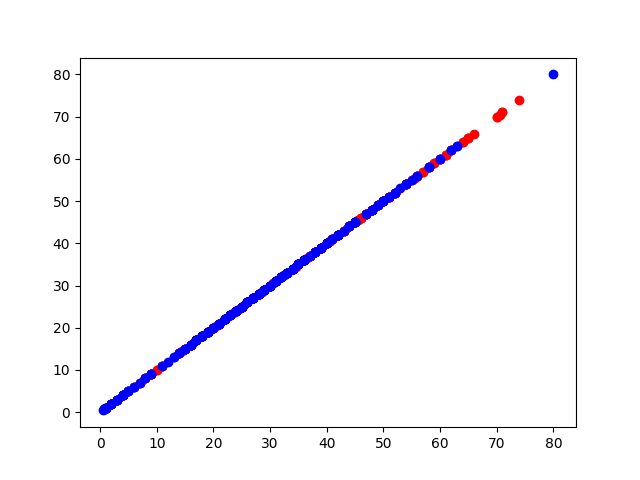

In [4]:
age = titanic.Age
survived = titanic.Survived

plt.plot(dead, dead, 'o', c='red')
plt.plot(surv, surv, 'o', c='blue')

In [5]:
import numpy as np
import pandas as pd
import math
import operator

titanic = pd.read_csv('titanic/train.csv')
surv = titanic[titanic['Survived'] == 1].Age
dead = titanic[titanic['Survived'] == 0].Age

age = titanic.Age
survived = titanic.Survived


def euclideanDistance(x, y):
    distance = 0
    for d in range(len(x)):
        if math.isnan(y[d]):
            distance += (x[d]) ** 2
        else:
            distance += (x[d] - y[d]) ** 2
    return math.sqrt(distance)


def getNeighbors(training, test, k):
    distance = []
    for d in range(len(training)):
        dist = euclideanDistance(test, training[d])
        distance.append((training[d], dist))

    distance.sort(key=lambda x: x[1])

    neighbors = []
    for x in range(k):
        neighbors.append(distance[x][0])
    return neighbors


def getResponse(neighbors):
    classVote = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in classVote:
            classVote[response] += 1
        else:
            classVote[response] = 1
    votes = sorted(classVote.items(), key=operator.itemgetter(1), reverse=True)
    return votes[0][0]

In [8]:

'''
    Esse algoritmo Knn faz uma classificação 
    se de acordo com a idade a pessoa foi dada como morta ou viva
    
'''

train = []
for i in range(len(age)):
    train.append([age[i], survived[i]])

k = 3
test = [[80]]

for t in test:
    n = getNeighbors(train, t, k)
    aux = getResponse(n)
    if aux == 1 :
        print("Idade", t[0], "Situação: Vivo")
    else:
        print("Idade", t[0], "Situação: Morto")

Idade 80 Situação: Morto
